<a href="https://colab.research.google.com/github/Nehaasati/DSA_1/blob/master/apple_stock_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key='1d1852f7fa02418ebafded4292f4079883c8405d')


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-22 00:00:00+00:00,127.61,128.06,127.0800,127.49,34039345,117.595601,118.010287,117.107194,117.485018,34039345,0.0,1.0
1,AAPL,2015-06-23 00:00:00+00:00,127.03,127.61,126.8792,127.48,30268863,117.061118,117.595601,116.922152,117.475803,30268863,0.0,1.0
2,AAPL,2015-06-24 00:00:00+00:00,128.11,129.80,127.1200,127.21,55280855,118.056363,119.613737,117.144055,117.226992,55280855,0.0,1.0
3,AAPL,2015-06-25 00:00:00+00:00,127.50,129.20,127.5000,128.86,31938100,117.494234,119.060823,117.494234,118.747505,31938100,0.0,1.0
4,AAPL,2015-06-26 00:00:00+00:00,126.75,127.99,126.5100,127.67,44066841,116.803091,117.945780,116.581926,117.650893,44066841,0.0,1.0


In [8]:
df2 = df.reset_index()['close']

In [9]:
df2[1228:]

1228    303.74
1229    310.13
1230    315.01
1231    311.41
1232    307.65
1233    309.54
1234    307.71
1235    314.96
1236    313.14
1237    319.23
1238    316.85
1239    318.89
1240    316.73
1241    318.11
1242    318.25
1243    317.94
1244    321.85
1245    323.34
1246    325.12
1247    322.32
1248    331.50
1249    333.46
1250    343.99
1251    352.84
1252    335.90
1253    338.80
1254    342.99
1255    352.08
1256    351.59
Name: close, dtype: float64

In [10]:
df2.shape

(1257,)

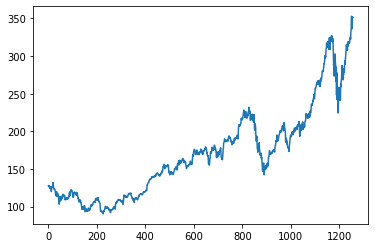

In [11]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=[0,1])
df1=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
df1

array([[0.14198095],
       [0.13977143],
       [0.14388571],
       ...,
       [0.96247619],
       [0.99710476],
       [0.9952381 ]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(train_data.shape)

(817, 1)


In [15]:
def create_dataset(dataset,time_stamp=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_stamp-1):
        a=dataset[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(dataset[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)
    

In [16]:
time_stamp=100
x_train,y_train=create_dataset(train_data,time_stamp)
x_test,y_test=create_dataset(test_data,time_stamp)

In [17]:
print(x_train.shape),print(x_test.shape)

(716, 100)
(339, 100)


(None, None)

In [18]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0170 - val_loss: 0.0445
Epoch 2/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 3/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 4/100
12/12 [==============================] - 2s 175ms/step - loss: 7.4526e-04 - val_loss: 0.0032
Epoch 5/100
12/12 [==============================] - 2s 176ms/step - loss: 5.0868e-04 - val_loss: 0.0034
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 4.9035e-04 - val_loss: 0.0030
Epoch 7/100
12/12 [==============================] - 2s 178ms/step - loss: 4.6770e-04 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 179ms/step - loss: 4.6528e-04 - val_loss: 0.0032
Epoch 9/100
12/12 [==============================] - 2s 181ms/step - loss: 4.8502e-04 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 183ms/step

In [23]:
train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

144.90251518557963

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

248.91420522482463

<function matplotlib.pyplot.show>

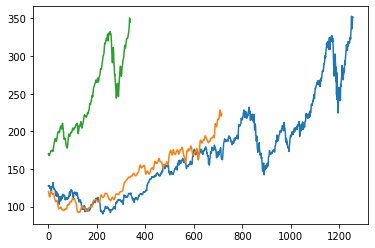

In [27]:
look_back=100
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#polt
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict)
plt.plot(test_predict)
plt.show

In [47]:
len(test_data)

440

In [28]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
from numpy import array
output=[]
n_step=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{}day input{}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape(1,n_step,1)
    yhat = model.predict(x_input,verbose=0)
    print("{}day input{}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    output.extend(yhat.tolist())
    i=i+1
  else:
      x_input=x_input.reshape(1,n_step,1)
      yhat = model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len[temp_input])
      output.extend(yhat.tolist())
      i=i+1

0day input[0.86609524 0.89142857 0.8896381  0.83493333 0.83169524 0.87051429
 0.88041905 0.89474286 0.87500952 0.8808     0.87340952 0.90232381
 0.89344762 0.89375238 0.87108571 0.88868571 0.8760381  0.84841905
 0.79177143 0.75329524 0.77070476 0.69782857 0.69721905 0.79417143
 0.75801905 0.80914286 0.77173333 0.75691429 0.66982857 0.74285714
 0.70510476 0.60148571 0.71478095 0.57855238 0.61912381 0.59554286
 0.58834286 0.52914286 0.51059048 0.59634286 0.5911619  0.64038095
 0.59961905 0.62655238 0.62457143 0.5736     0.58891429 0.57550476
 0.65573333 0.64415238 0.66944762 0.6767619  0.6968     0.74937143
 0.73939048 0.748      0.73318095 0.71081905 0.67820952 0.70765714
 0.70358095 0.73382857 0.73459048 0.71710476 0.7519619  0.77508571
 0.75706667 0.77264762 0.78940952 0.80110476 0.81295238 0.83729524
 0.85588571 0.84217143 0.82784762 0.83504762 0.82807619 0.85569524
 0.8487619  0.8719619  0.86289524 0.87066667 0.8624381  0.86769524
 0.86822857 0.86704762 0.88194286 0.88761905 0.8944 

In [46]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [37]:
len(df1)

1257

In [39]:
df3=df1.tolist()
df3.extend(output)

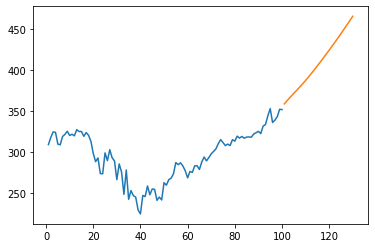

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_predict,scaler.inverse_transform(output))

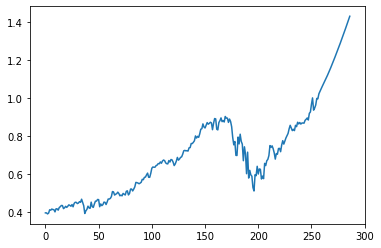

In [48]:
plt.plot(df3[1000:])